### <font color=burgandy> Lead Scoring Case Study:</font>
#### <font color=burgandy> Chethan BR (chethanbr86@gmail.com) </font>
#### <font color=burgandy> Shreya Singh (shreyasingh1092@gmail.com)

### <font color=orange>  Importing rquired Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Libraries for NumPy, Pandas, Matplotlib and Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 500)

In [4]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing Standard Scaler 
from sklearn.preprocessing import StandardScaler

#Importing Statsmodels
import statsmodels.api as sm

# Importing SKLearn for Logistic Regression and RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Importing statsmodels for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing SKLearn for metrics like Accuracy, Sensitivity, Specificity
from sklearn import metrics

# Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

# Importing SKLearn for Precision and Recall
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Creating report for precision and recall
from sklearn.metrics import classification_report

### <font color=orange>  Reading and Understanding Data

In [5]:
leadscore_df = pd.read_csv('Leads.csv')
leadscore_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [6]:
#Checking the shape of the dataset
leadscore_df.shape

(9240, 37)

#### <font color=green> Insights: Dataframe has 9240 rows and 37 columns

### <font color=orange> Checking for Null values, Data type and Unique values

In [7]:
def missing_values_dtype(df):     
    # Sum of null values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Data type 
    data_type = df.dtypes
    
    #unique values
    unique = df.nunique()
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent,data_type, unique], axis=1)   
        
    # Rename the columns for clarity
    mis_val_table_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'Data_Type', 3: 'Unique values'})
    return mis_val_table_columns

In [8]:
missing_values_dtype(leadscore_df)

,Missing Values,% of Total Values,Data_Type,Unique values
Prospect ID,0,0.000000,object,9240
Lead Number,0,0.000000,int64,9240
Lead Origin,0,0.000000,object,5
Lead Source,36,0.389610,object,21
Do Not Email,0,0.000000,object,2
Do Not Call,0,0.000000,object,2
Converted,0,0.000000,int64,2
TotalVisits,137,1.482684,float64,41
Total Time Spent on Website,0,0.000000,int64,1731
Page Views Per Visit,137,1.482684,float64,114


#### <font color=green> Insights: </font>
##### <font color=green>    - There are high percentage of Null Values present in the dataset.</font>
##### <font color=green>    - There are object, Float and Integer data types.</font>
##### <font color=green>    - We will be removing columns with single value columns, impute and categorize with other columns

### <font color=orange> Data Imbalance check for Target variable

In [9]:
# Calculating % of of Non Converted and Converted Leads in the Dataset
round(100*leadscore_df['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    61.461
1    38.539
Name: Converted, dtype: float64

Text(0, 0.5, '% of Conversion')

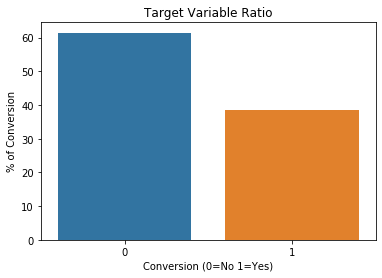

In [10]:
# Plot representing the Imbalance Percentage in lead DataFrame
plot = sns.barplot(x="Converted", y="Converted",
                 data=leadscore_df, estimator=lambda x: len(x) / len(leadscore_df) * 100)
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')

#### <font color=green> INSIGHT: Our Target variable is having a 62:38 ratio, and seems to be properly balanced with respect to the conversion ratio

### <font color=orange> Data Cleaning

#### <font color=orange> Deleting 'Prospect ID' and Columns with single value as 'No'

In [11]:
leadscore_df = leadscore_df.drop(['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)
leadscore_df.shape

(9240, 31)

### <font color=orange> Checking Unique Counts with more than 2 values in each column

In [12]:
leadscore_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [13]:
leadscore_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
testone                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [14]:
leadscore_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [15]:
leadscore_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Netherlands                2
Italy                      2
Ghana                      2
Uganda                     2
Bangladesh                 2
China                      2
Philippines                2
Belgium                    2
Asia/Pacific Region        2
Switzerland                1
Vietnam                    1
Tanzania                   1
Kenya                      1
Liberia                    1
Malaysia      

In [16]:
leadscore_df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
leadscore_df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
leadscore_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
leadscore_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
leadscore_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [21]:
leadscore_df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [22]:
leadscore_df['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
leadscore_df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
leadscore_df['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [25]:
leadscore_df['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [26]:
leadscore_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

#### <font color=green> Insights: Here we have Select as an attribute which can be converted to NaN's and since there are lot of other attributes in every columns, we can categorize it as Others.

#### <font color=orange> Imputing Select with NaN and removing highly skewed columns

In [27]:
leadscore_df = leadscore_df.replace('Select',np.nan)

In [28]:
missing_values_dtype(leadscore_df)

,Missing Values,% of Total Values,Data_Type,Unique values
Lead Number,0,0.000000,int64,9240
Lead Origin,0,0.000000,object,5
Lead Source,36,0.389610,object,21
Do Not Email,0,0.000000,object,2
Do Not Call,0,0.000000,object,2
Converted,0,0.000000,int64,2
TotalVisits,137,1.482684,float64,41
Total Time Spent on Website,0,0.000000,int64,1731
Page Views Per Visit,137,1.482684,float64,114
Last Activity,103,1.114719,object,17


In [29]:
leadscore_df.drop(['Country','What matters most to you in choosing a course','City'], axis=1, inplace=True)

In [30]:
leadscore_df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened


#### <font color=orange> Removing columns above 40% null values

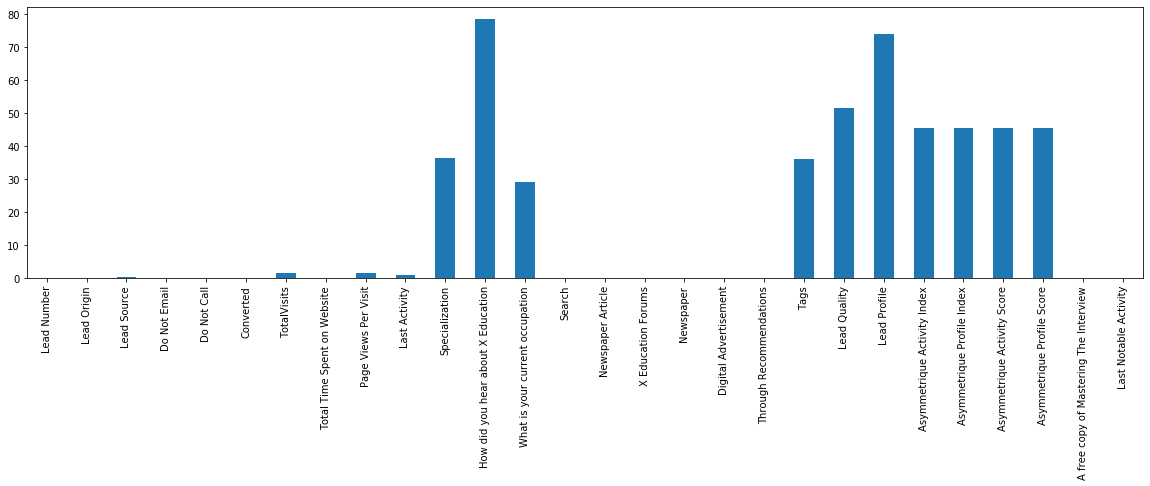

In [31]:
mis_val_percent = 100 * leadscore_df.isnull().sum() / len(leadscore_df)
plt.figure(figsize=(20,5))
mis_val_percent.plot(kind='bar')
plt.show()

In [32]:
df_percent_null = leadscore_df.isnull().sum() / len(leadscore_df)
df_column_del = df_percent_null[df_percent_null > 0.40].index
leadscore_df.drop(df_column_del, axis=1, inplace=True)
leadscore_df.shape

(9240, 21)

### <font color=orange> Categorical Columns: Imputing NaN with 'Others', 'Mode' and plotting Conversion Ratio

In [33]:
100*leadscore_df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [34]:
leadscore_df['Lead Origin']= leadscore_df['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Others')

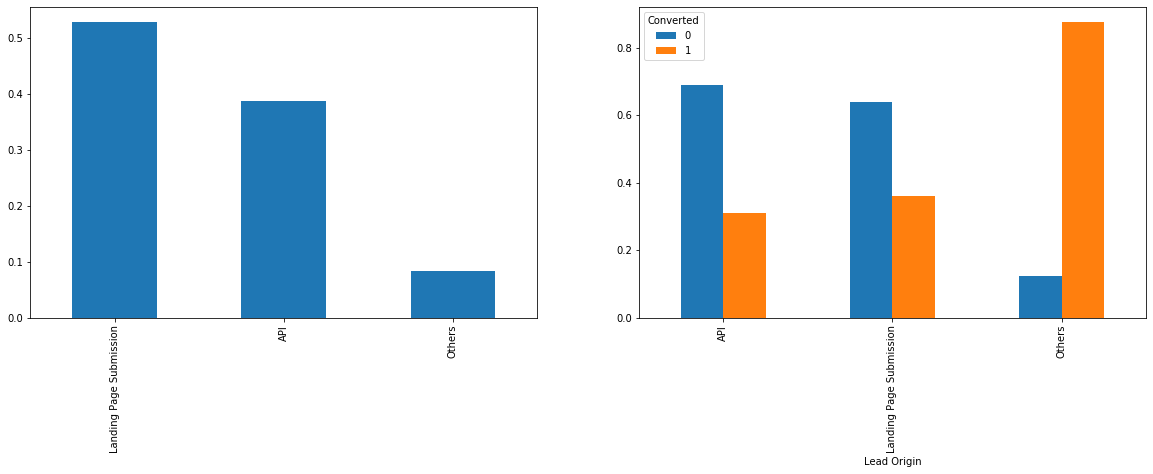

In [35]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Lead Origin'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Lead Origin'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color=green> Insights:
- #### <font color=green> Univariate Analysis states that Lead Origin from 'Landing Page Submission' has greater percentage value than 'API'.
- #### <font color=green> Bivariate Analysis states that 'Landing Page Submission' has high Conversion rate than 'API'. Whereas, 'others' has the hightset among three.

In [36]:
100*leadscore_df['Lead Source'].value_counts(normalize=True)

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
WeLearn               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
testone               0.010865
youtubechannel        0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [37]:
leadscore_df['Lead Source']= leadscore_df['Lead Source'].replace('google', "Google")
leadscore_df['Lead Source']= leadscore_df['Lead Source'].replace(np.nan, "Google")
leadscore_df['Lead Source']= leadscore_df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','youtubechannel','WeLearn','NC_EDM','blog',
                                                                   'welearnblog_Home','testone','Pay per Click Ads'],'Others')

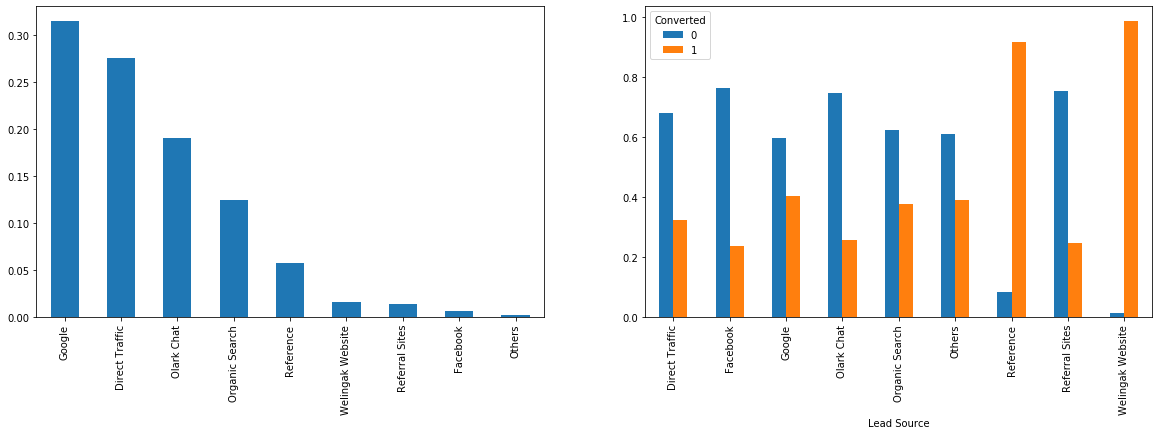

In [38]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Lead Source'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Lead Source'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

- #### <font color=green>INSIGHT: 
- #### <font color=green>Univariate Analysis states that the Lead Source from 'Google' has greater percentage value than from 'Direct Traffic' 
- #### <font color=green>Bivariate Analysis states that 'Google' as a Lead Source has more conversion rate than from 'Direct Traffic'.

In [39]:
100*leadscore_df['Last Activity'].value_counts(normalize=True)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64

- #### <font color=green>Note:

     - #### <font color=green> Looking at the proportions of various values in 'Last Activity' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

     - #### <font color=green>Earlier from our Null value check, we noted that 'Last Activity' has 103 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Email Opened'.

In [40]:
leadscore_df['Last Activity']= leadscore_df['Last Activity'].replace(np.nan,'Email Opened')
leadscore_df['Last Activity']= leadscore_df['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                                     'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

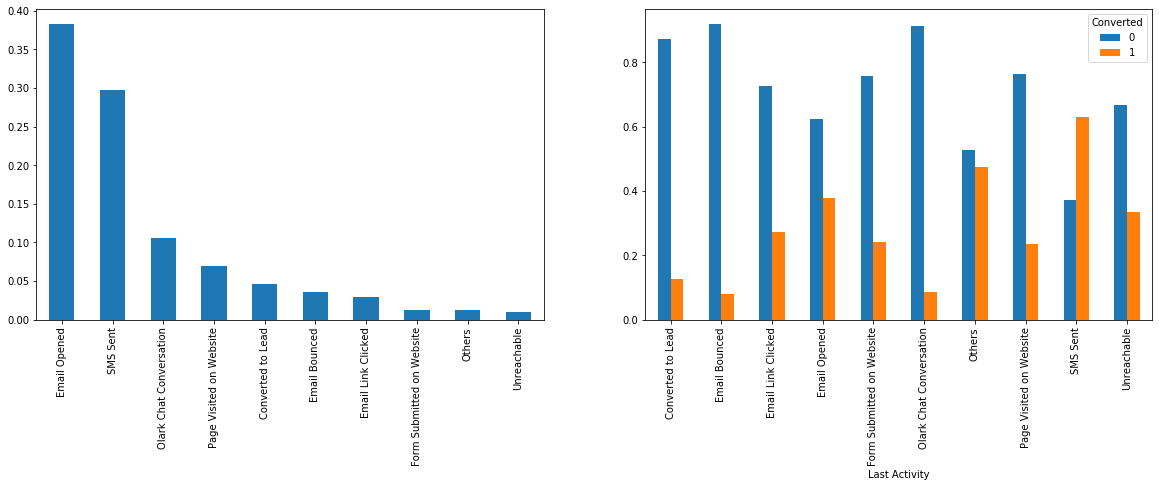

In [41]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Last Activity'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Last Activity'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

- #### <font color=green>INSIGHT: 
- #### <font color=green>Univariate Analysis states that the Last Activity from 'Email Opened' has more percentage value than from 'SMS Sent' 
- #### <font color=green>Bivariate Analysis states that 'Email Opened' as a Last Activity has less conversion rate than from 'SMS Sent'.

In [42]:
100*leadscore_df['Specialization'].value_counts(normalize=True)

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [43]:
leadscore_df['Specialization']= leadscore_df['Specialization'].replace(np.nan,'Others')

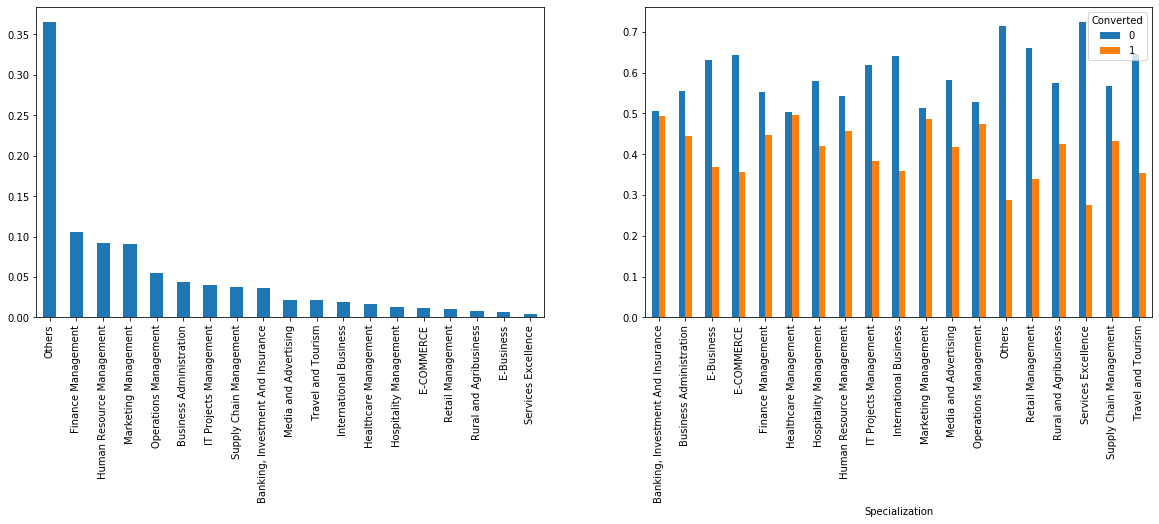

In [44]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Specialization'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Specialization'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

In [45]:
100*leadscore_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

- #### <font color=green>Note:
    
   - #### <font color=green>Looking at the proportions of various values in 'Specialization' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

   - #### <font color=green>Earlier from our Null value check, we noted that 'Specialization' has 3380 NULL values. We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not worked in any industry earlier. So we will categorise them into Others.

In [46]:
leadscore_df['What is your current occupation']= leadscore_df['What is your current occupation'].replace(np.nan,'Others')
leadscore_df['What is your current occupation']= leadscore_df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

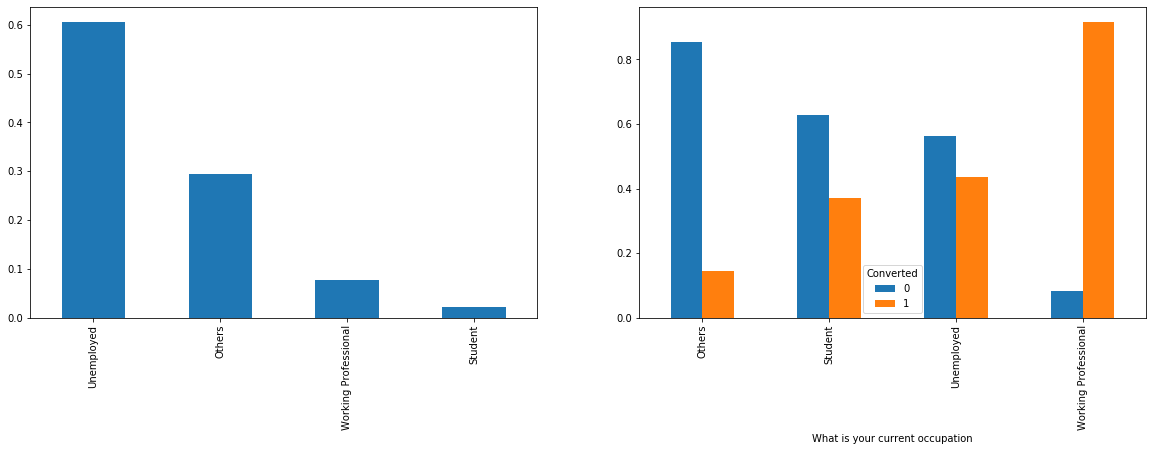

In [47]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['What is your current occupation'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['What is your current occupation'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color=green>INSIGHT: 
- #### <font color=green>Univariate Analysis states that the Specialization is from 'Others' category has more percentage value followed by 'Working Professional'
- #### <font color=green>Bivariate Analysis states that 'Working Professional' as a Specialization has higher rate of conversions than any other category.

In [48]:
leadscore_df['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

- #### <font color=green>Note:
    
   - #### <font color=green> Looking at the proportions of various values in 'Tags' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

   - #### <font color=green>Earlier from our Null value check, we noted that 'Tags' has 3353 NULL values. We will impute the NULL values with MODE, in this case as 'Others'.

In [49]:
leadscore_df['Tags']= leadscore_df['Tags'].replace(np.nan,'Others')
leadscore_df['Tags']= leadscore_df['Tags'].replace(['Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress',
                                                    'invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others',
                                                    'Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch',
                                                    'Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others')

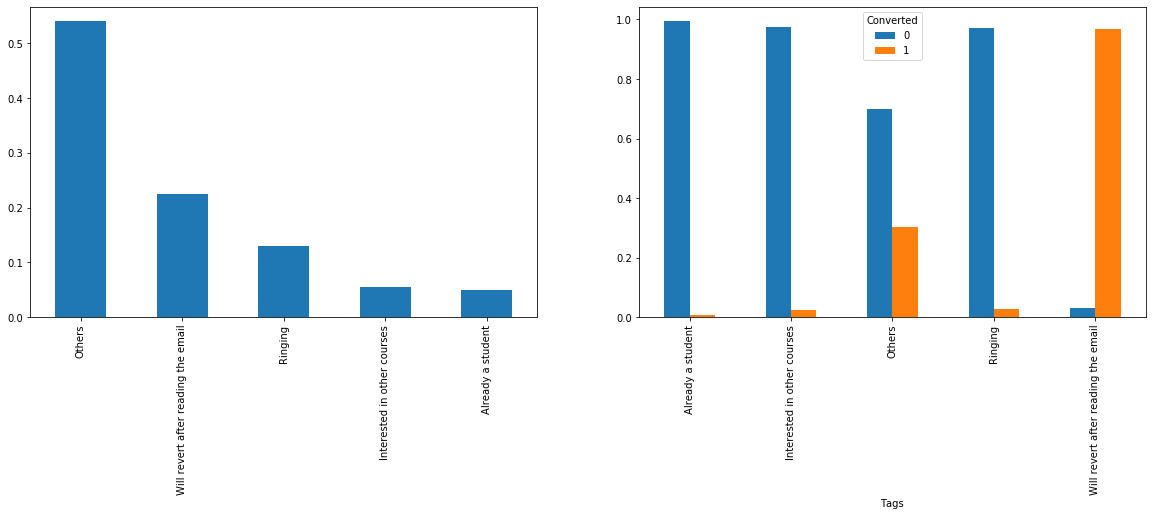

In [50]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Tags'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Tags'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

- #### <font color=green>INSIGHT: 
- #### <font color=green>Univariate Analysis states that the Tags from 'Others' category, has highest percentage followed by from 'Will revert after reading the email'.
- #### <font color=green>Bivariate Analysis states that 'Will revert after reading the email' as a Tags has highest Conversion rate than 'Others'

In [51]:
100*leadscore_df['Last Notable Activity'].value_counts(normalize=True)

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

- #### <font color=green>Note:
    
    - #### <font color=green>Looking at the proportions of various values in 'Last Notable Activity' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

In [52]:
leadscore_df['Last Notable Activity']= leadscore_df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation',
                                                                                     'Email Marked Spam','Resubscribed to emails','View in browser link Clicked',
                                                                                     'Approached upfront','Form Submitted on Website','Email Received'],'Others')

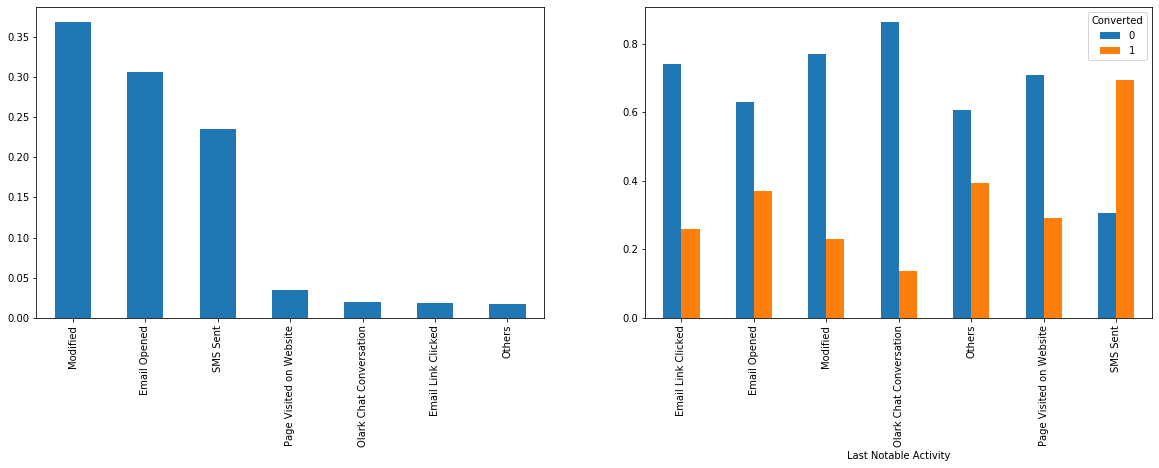

In [53]:
plt.figure(figsize=(20, 12))
ax= plt.subplot(221)
leadscore_df['Last Notable Activity'].value_counts(normalize=True).plot(kind='bar')
ax=plt.subplot(222)
pd.crosstab(leadscore_df['Last Notable Activity'],leadscore_df['Converted']).apply(lambda x:x/x.sum(), axis=1).plot(kind='bar',ax=ax)
plt.subplots_adjust(hspace=.1)
plt.show()

- #### <font color=green>INSIGHT: 
- #### <font color=green>Univariate Analysis states thatthe Last Notable Activity 'Modified' category has high percentage followed by from 'Email Opened' category.
- #### <font color=green>Bivariate Analysis states that 'Email Opened' has high conversion rate than 'Modified' category.

#### <font color=orange> Numerical Columns: Imputing NaN with mode values

In [54]:
leadscore_df.describe(percentiles=(.25,.5,.75,.9,.95,.99))

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [55]:
TotalVisits_median = leadscore_df['TotalVisits'].median()
TotalVisits_median

3.0

In [56]:
leadscore_df['TotalVisits'] = leadscore_df['TotalVisits'].replace(np.nan, TotalVisits_median)

In [57]:
Viewspervisit_median = leadscore_df['Page Views Per Visit'].median()
Viewspervisit_median

2.0

In [58]:
leadscore_df['Page Views Per Visit'] = leadscore_df['Page Views Per Visit'].replace(np.nan, Viewspervisit_median)

### <font color=orange> Treating Outliers and Visualizing the same

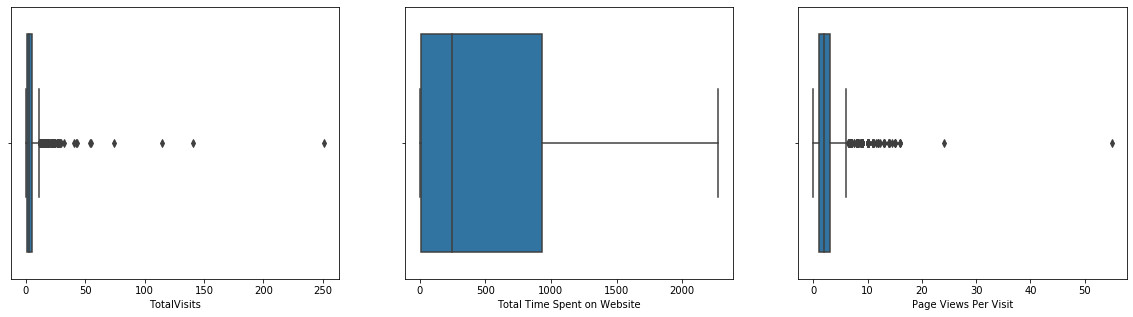

In [59]:
col_data = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(20,5))
for i in enumerate(col_data):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(leadscore_df[i[1]])

#### <font color=green> We can see outliers in 2 columns and can be treated by Capping the same

In [60]:
col_data = ['TotalVisits','Page Views Per Visit']

for i in col_data:
    q1 = leadscore_df[i].quantile(0.01)
    q4 = leadscore_df[i].quantile(0.99)
    leadscore_df[i][leadscore_df[i]<=q1]=q1
    leadscore_df[i][leadscore_df[i]>=q4]=q4

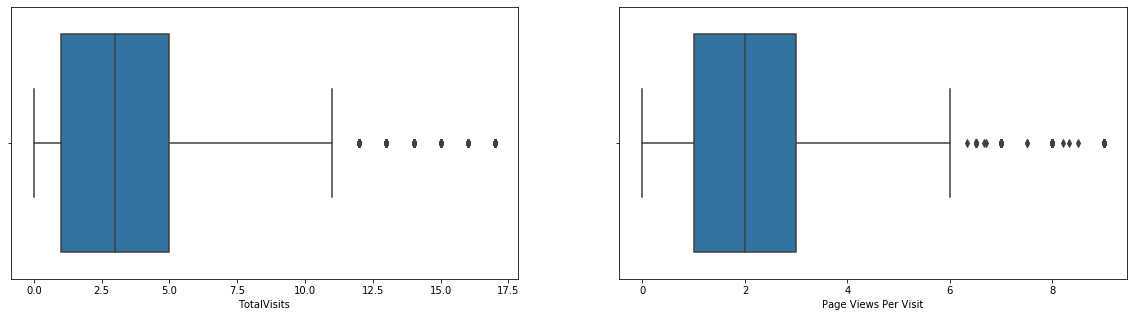

In [61]:
col_data = ['TotalVisits','Page Views Per Visit']

plt.figure(figsize=(20,5))
for i in enumerate(col_data):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(leadscore_df[i[1]])

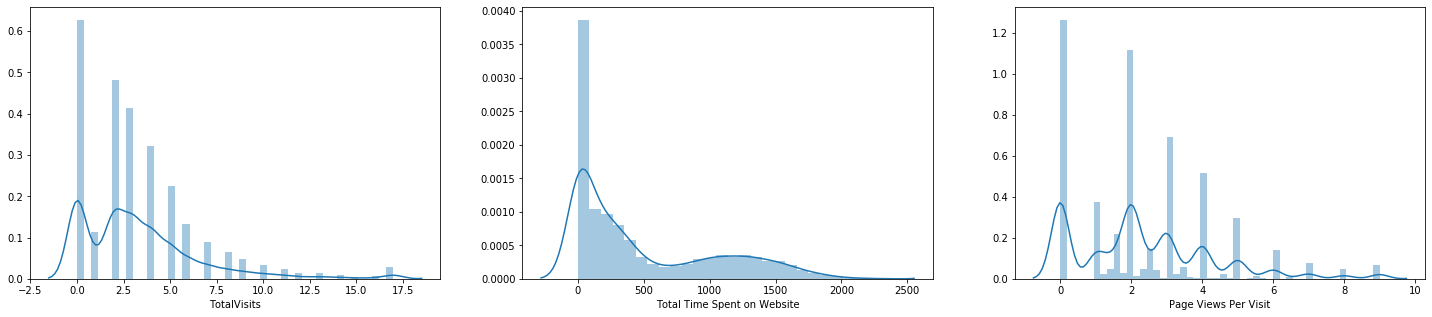

In [62]:
col_data = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(25,5))
for i in enumerate(col_data):
    plt.subplot(1,3,i[0]+1)
    sns.distplot(leadscore_df[i[1]])

### <font color=orange>  Final Column data

In [63]:
missing_values_dtype(leadscore_df)

,Missing Values,% of Total Values,Data_Type,Unique values
Lead Number,0,0.0,int64,9240
Lead Origin,0,0.0,object,3
Lead Source,0,0.0,object,9
Do Not Email,0,0.0,object,2
Do Not Call,0,0.0,object,2
Converted,0,0.0,int64,2
TotalVisits,0,0.0,float64,18
Total Time Spent on Website,0,0.0,int64,1731
Page Views Per Visit,0,0.0,float64,102
Last Activity,0,0.0,object,10


In [64]:
leadscore_df.shape

(9240, 21)

### <font color=orange> Univariate Analysis and Bivariate Analysis

#### <font color=orange> Categorical Variables

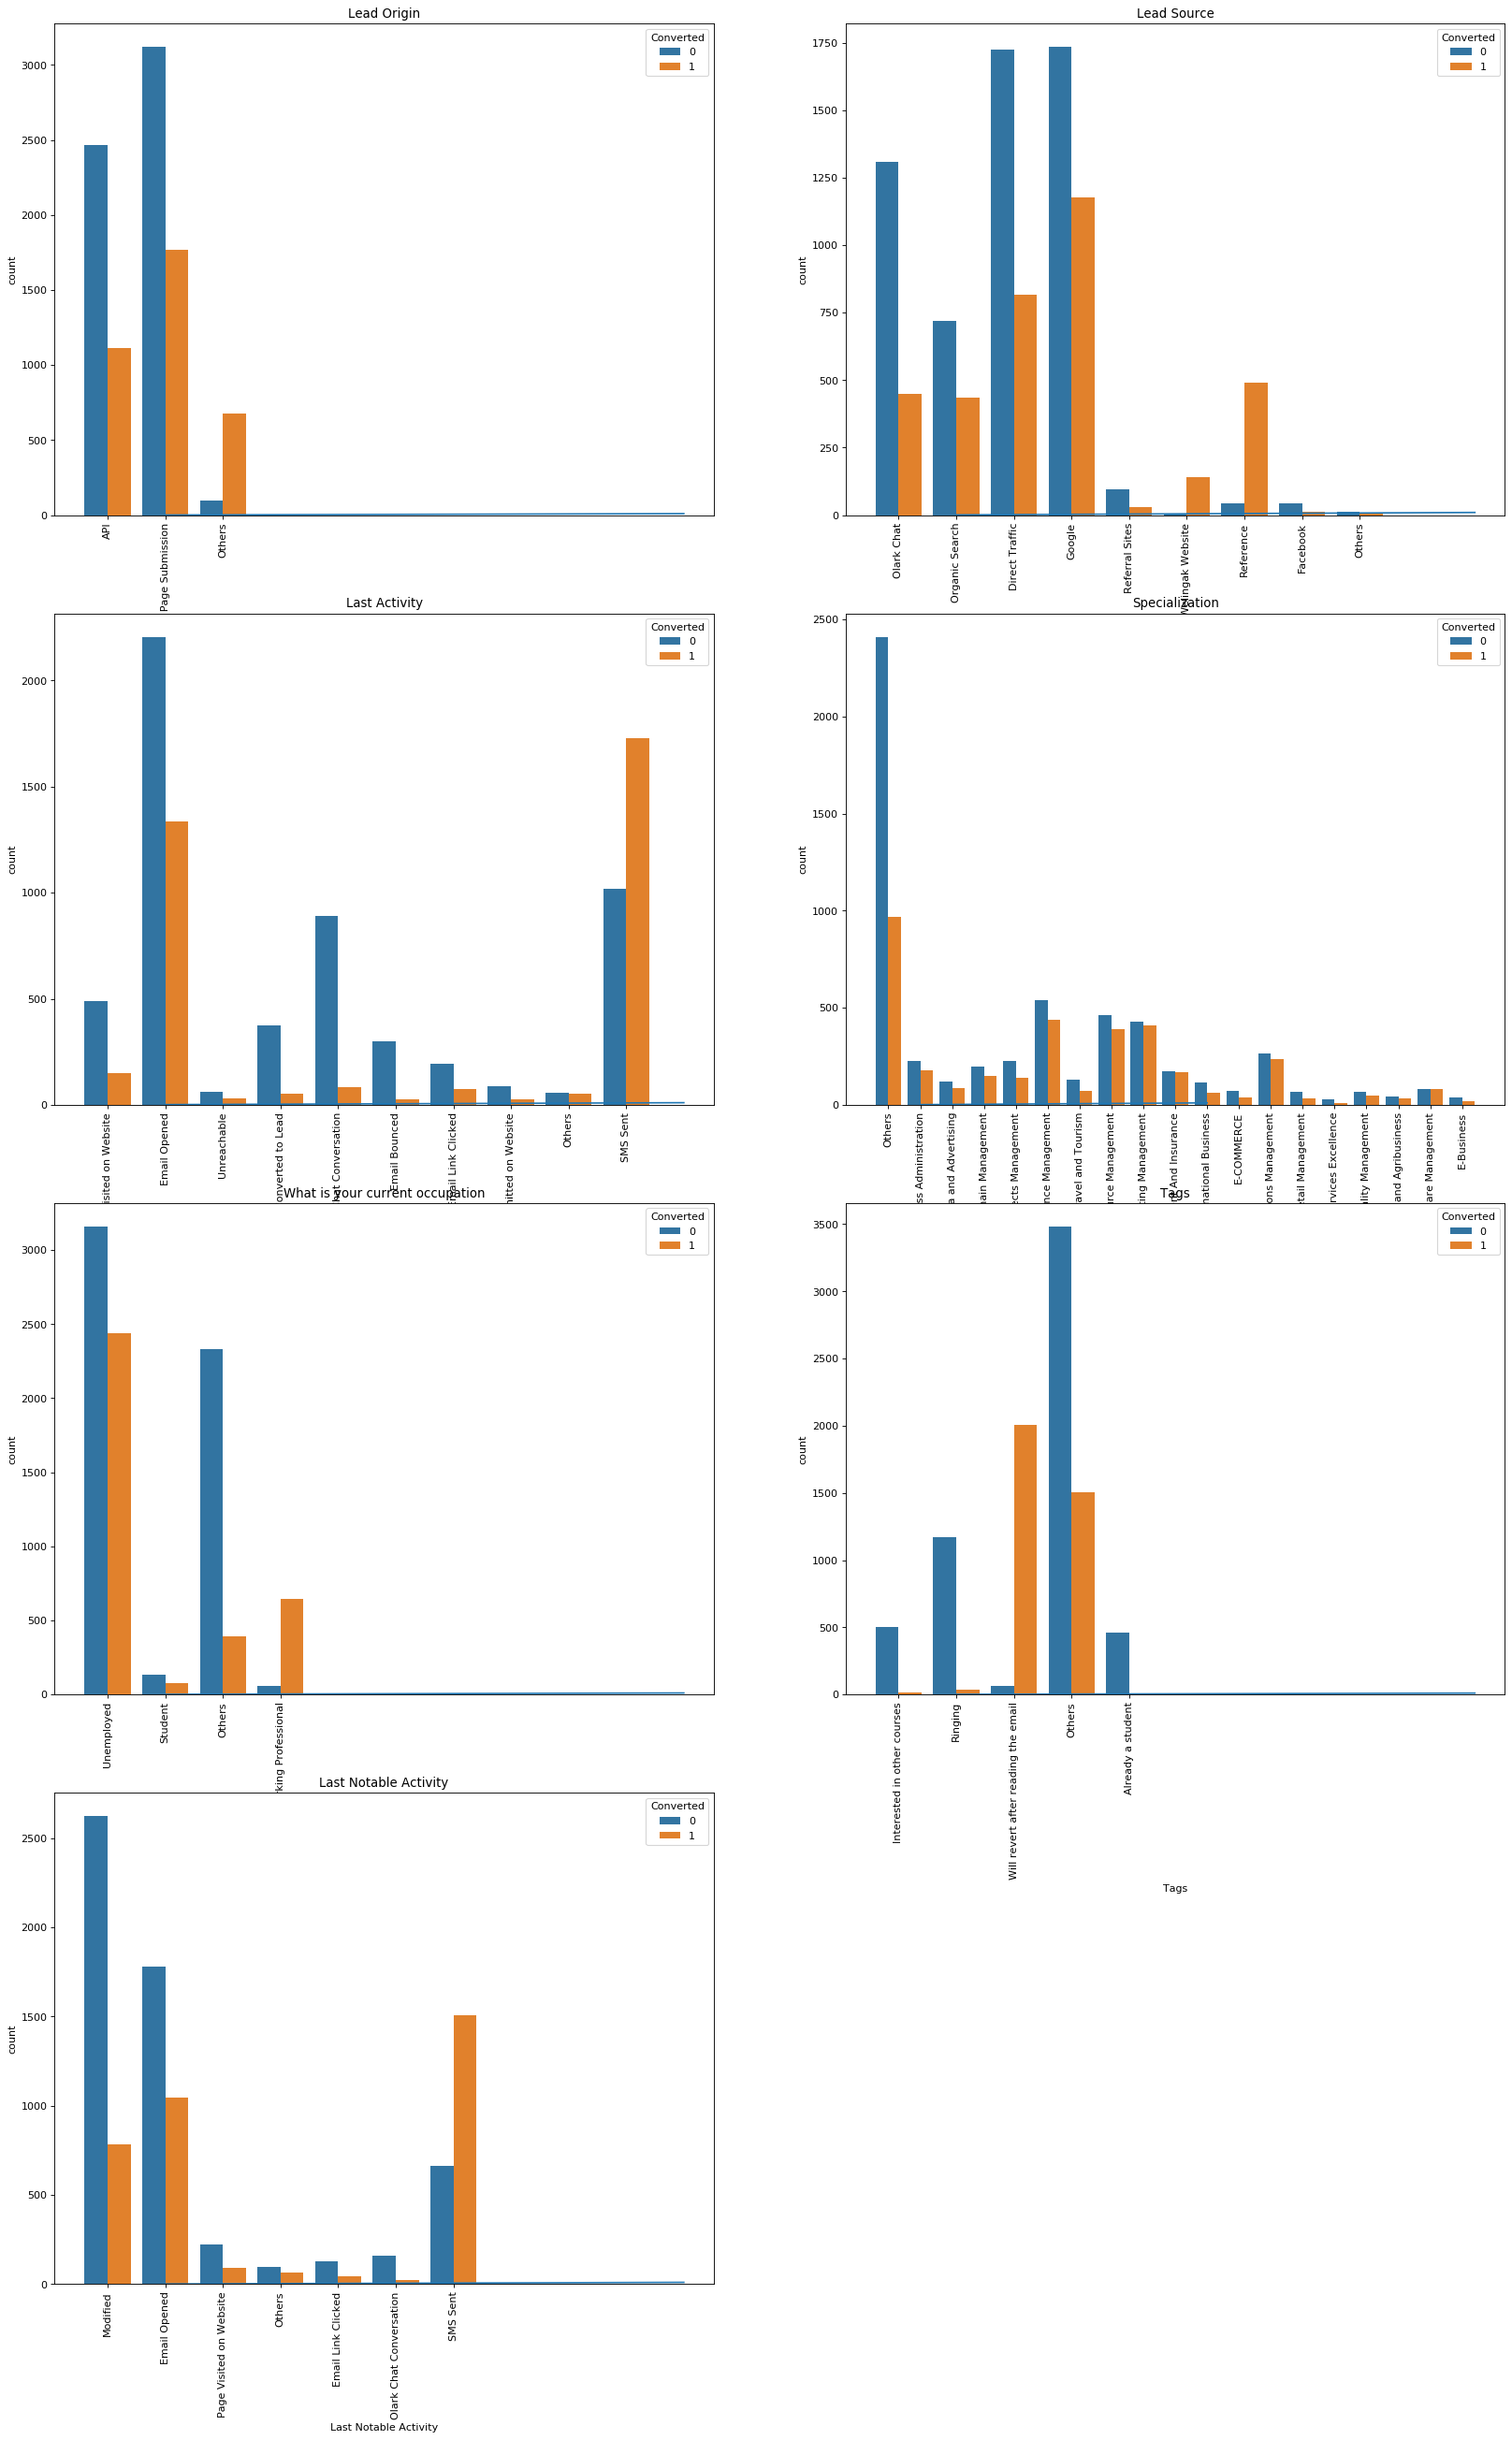

In [65]:
x = np.linspace(1, 10, 100)
plt.figure(figsize=(25,40),dpi=80)
plt.subplot(4,2,1)
sns.countplot(x="Lead Origin", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Lead Origin')
plt.plot(x,x)
plt.subplot(4,2,2)
sns.countplot(x="Lead Source", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Lead Source')
plt.plot(x,x)
plt.subplot(4,2,3)
sns.countplot(x="Last Activity", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Last Activity')
plt.plot(x,x)
plt.subplot(4,2,4)
sns.countplot(x="Specialization", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Specialization')
plt.plot(x,x)
plt.subplot(4,2,5)
sns.countplot(x="What is your current occupation", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('What is your current occupation')
plt.plot(x,x)
plt.subplot(4,2,6)
sns.countplot(x="Tags", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Tags')
plt.plot(x,x)
plt.subplot(4,2,7)
sns.countplot(x="Last Notable Activity", data=leadscore_df, hue='Converted')
plt.xticks(rotation=90)
#plt.ylabel('True Positive Rate')
plt.title('Last Notable Activity')
plt.plot(x,x)
plt.show()

- #### <font color=green>Insights: We conclude that Lead Origin-'Page Submission', Lead Source-'Google', Last activity-'SMS Sent', Specialization-'Others', What's your cuurent occupation-'Unemployed', Tags-'Will revert after reading the email', Last Notable Activity-'SMS Sent' has highest conversion rates.

#### <font color=orange> Numerical Variables

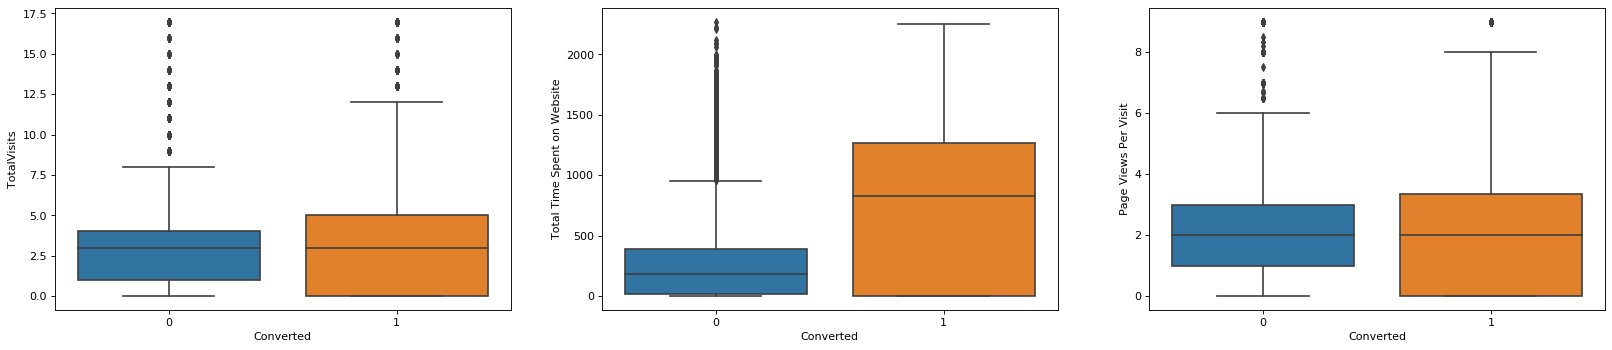

In [66]:
plt.figure(figsize=(25,5),dpi=80)
plt.subplot(1,3,1)
sns.boxplot(x="Converted", y="TotalVisits", data= leadscore_df)
plt.subplot(1,3,2)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data= leadscore_df)
plt.subplot(1,3,3)
sns.boxplot(x="Converted", y="Page Views Per Visit", data= leadscore_df)
plt.show()

- #### <font color=green>Insights: Total Time Spent on Website has highest conversion rate and Page Views Per Visit has more values.

#### <font color=orange> Ordinal Data

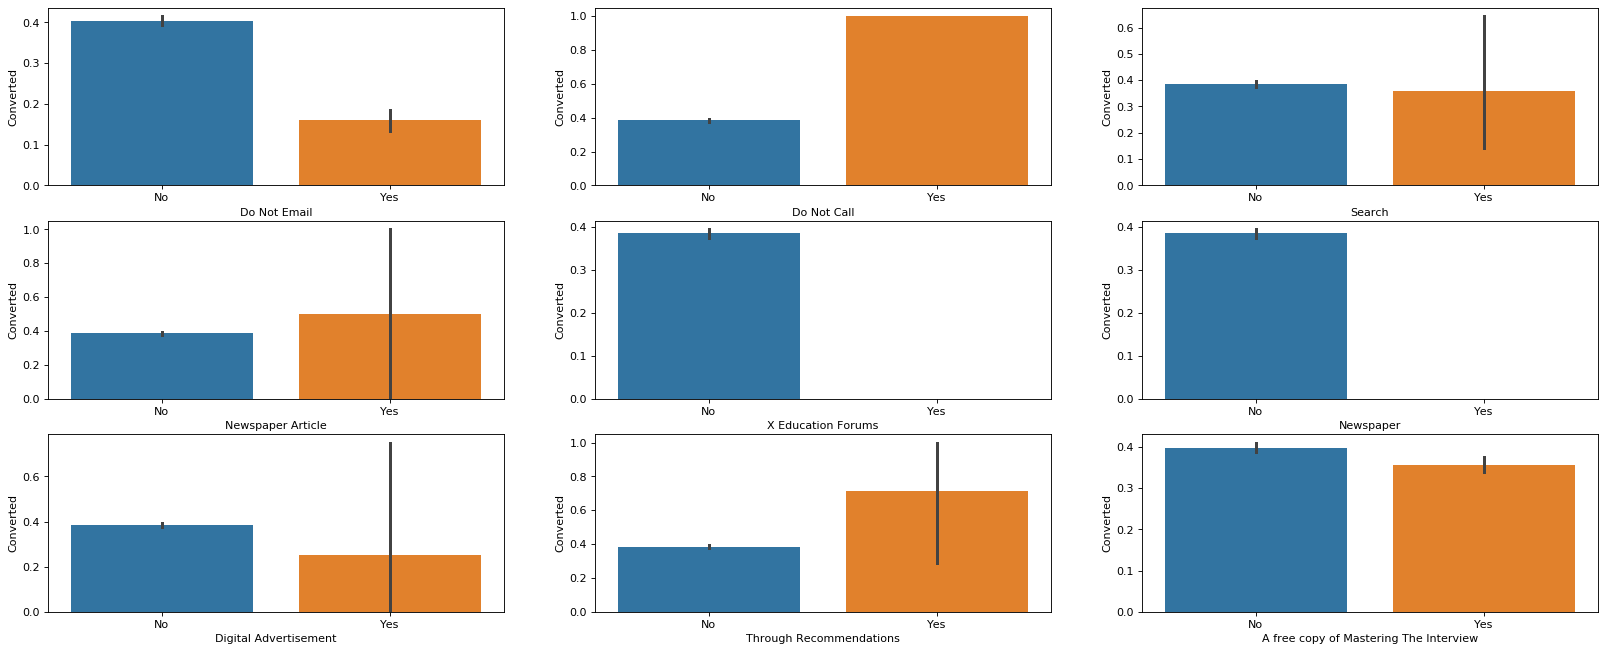

In [67]:
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(3,3,1)
sns.barplot(x='Do Not Email',y='Converted', data=leadscore_df)
plt.subplot(3,3,2)
sns.barplot(x="Do Not Call", y='Converted', data=leadscore_df)
plt.subplot(3,3,3)
sns.barplot(x="Search", y='Converted', data=leadscore_df)
plt.subplot(3,3,4)
sns.barplot(x="Newspaper Article", y='Converted', data=leadscore_df)
plt.subplot(3,3,5)
sns.barplot(x="X Education Forums", y='Converted', data=leadscore_df, )
plt.subplot(3,3,6)
sns.barplot(x="Newspaper", y='Converted', data=leadscore_df)
plt.subplot(3,3,7)
sns.barplot(x="Digital Advertisement", y='Converted', data=leadscore_df)
plt.subplot(3,3,8)
sns.barplot(x="Through Recommendations", y='Converted', data=leadscore_df)
plt.subplot(3,3,9)
sns.barplot(x="A free copy of Mastering The Interview", y='Converted', data=leadscore_df)
plt.show()

- #### <font color=green>Insights: We can see that conversion rates in 'Do Not Call', 'Newspaper Article', 'Through Recomendations' are higher compared to all other categories in the above plot.

### <font color=orange> Heatmap

(5.5, -0.5)

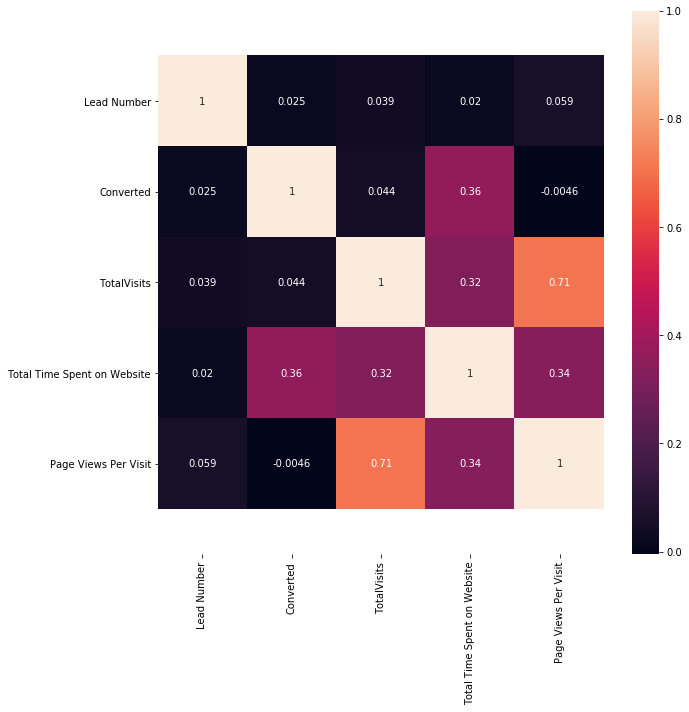

In [68]:
df_corr = leadscore_df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [69]:
df_corr = leadscore_df.corr()
df_corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.038873,0.020329,0.059445
Converted,0.025157,1.000000,0.043716,0.362483,-0.004603
TotalVisits,0.038873,0.043716,1.000000,0.324556,0.706203
Total Time Spent on Website,0.020329,0.362483,0.324556,1.000000,0.336715
Page Views Per Visit,0.059445,-0.004603,0.706203,0.336715,1.000000


#### <font color=green> - INSIGHT: The Heat Map tells us that there is a strong correlation between certain variables which will be handled during Multi Colinearity check.

### <font color=orange> Mapping Variables

In [70]:
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadscore_df[varlist] = leadscore_df[varlist].apply(binary_map)
leadscore_df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened


### <font color=orange> Creating Dummy Variables

In [71]:
dummy_var = pd.get_dummies(leadscore_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation','Tags', 'Last Notable Activity']], drop_first=True)
leadscore_df = pd.concat([leadscore_df, dummy_var], axis=1)
leadscore_df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


#### <font color=orange> Dropping repeated columns

In [72]:
leadscore_df.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Tags','Last Notable Activity'], axis=1, inplace=True)
leadscore_df.shape

(9240, 64)

In [73]:
leadscore_df.head(2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


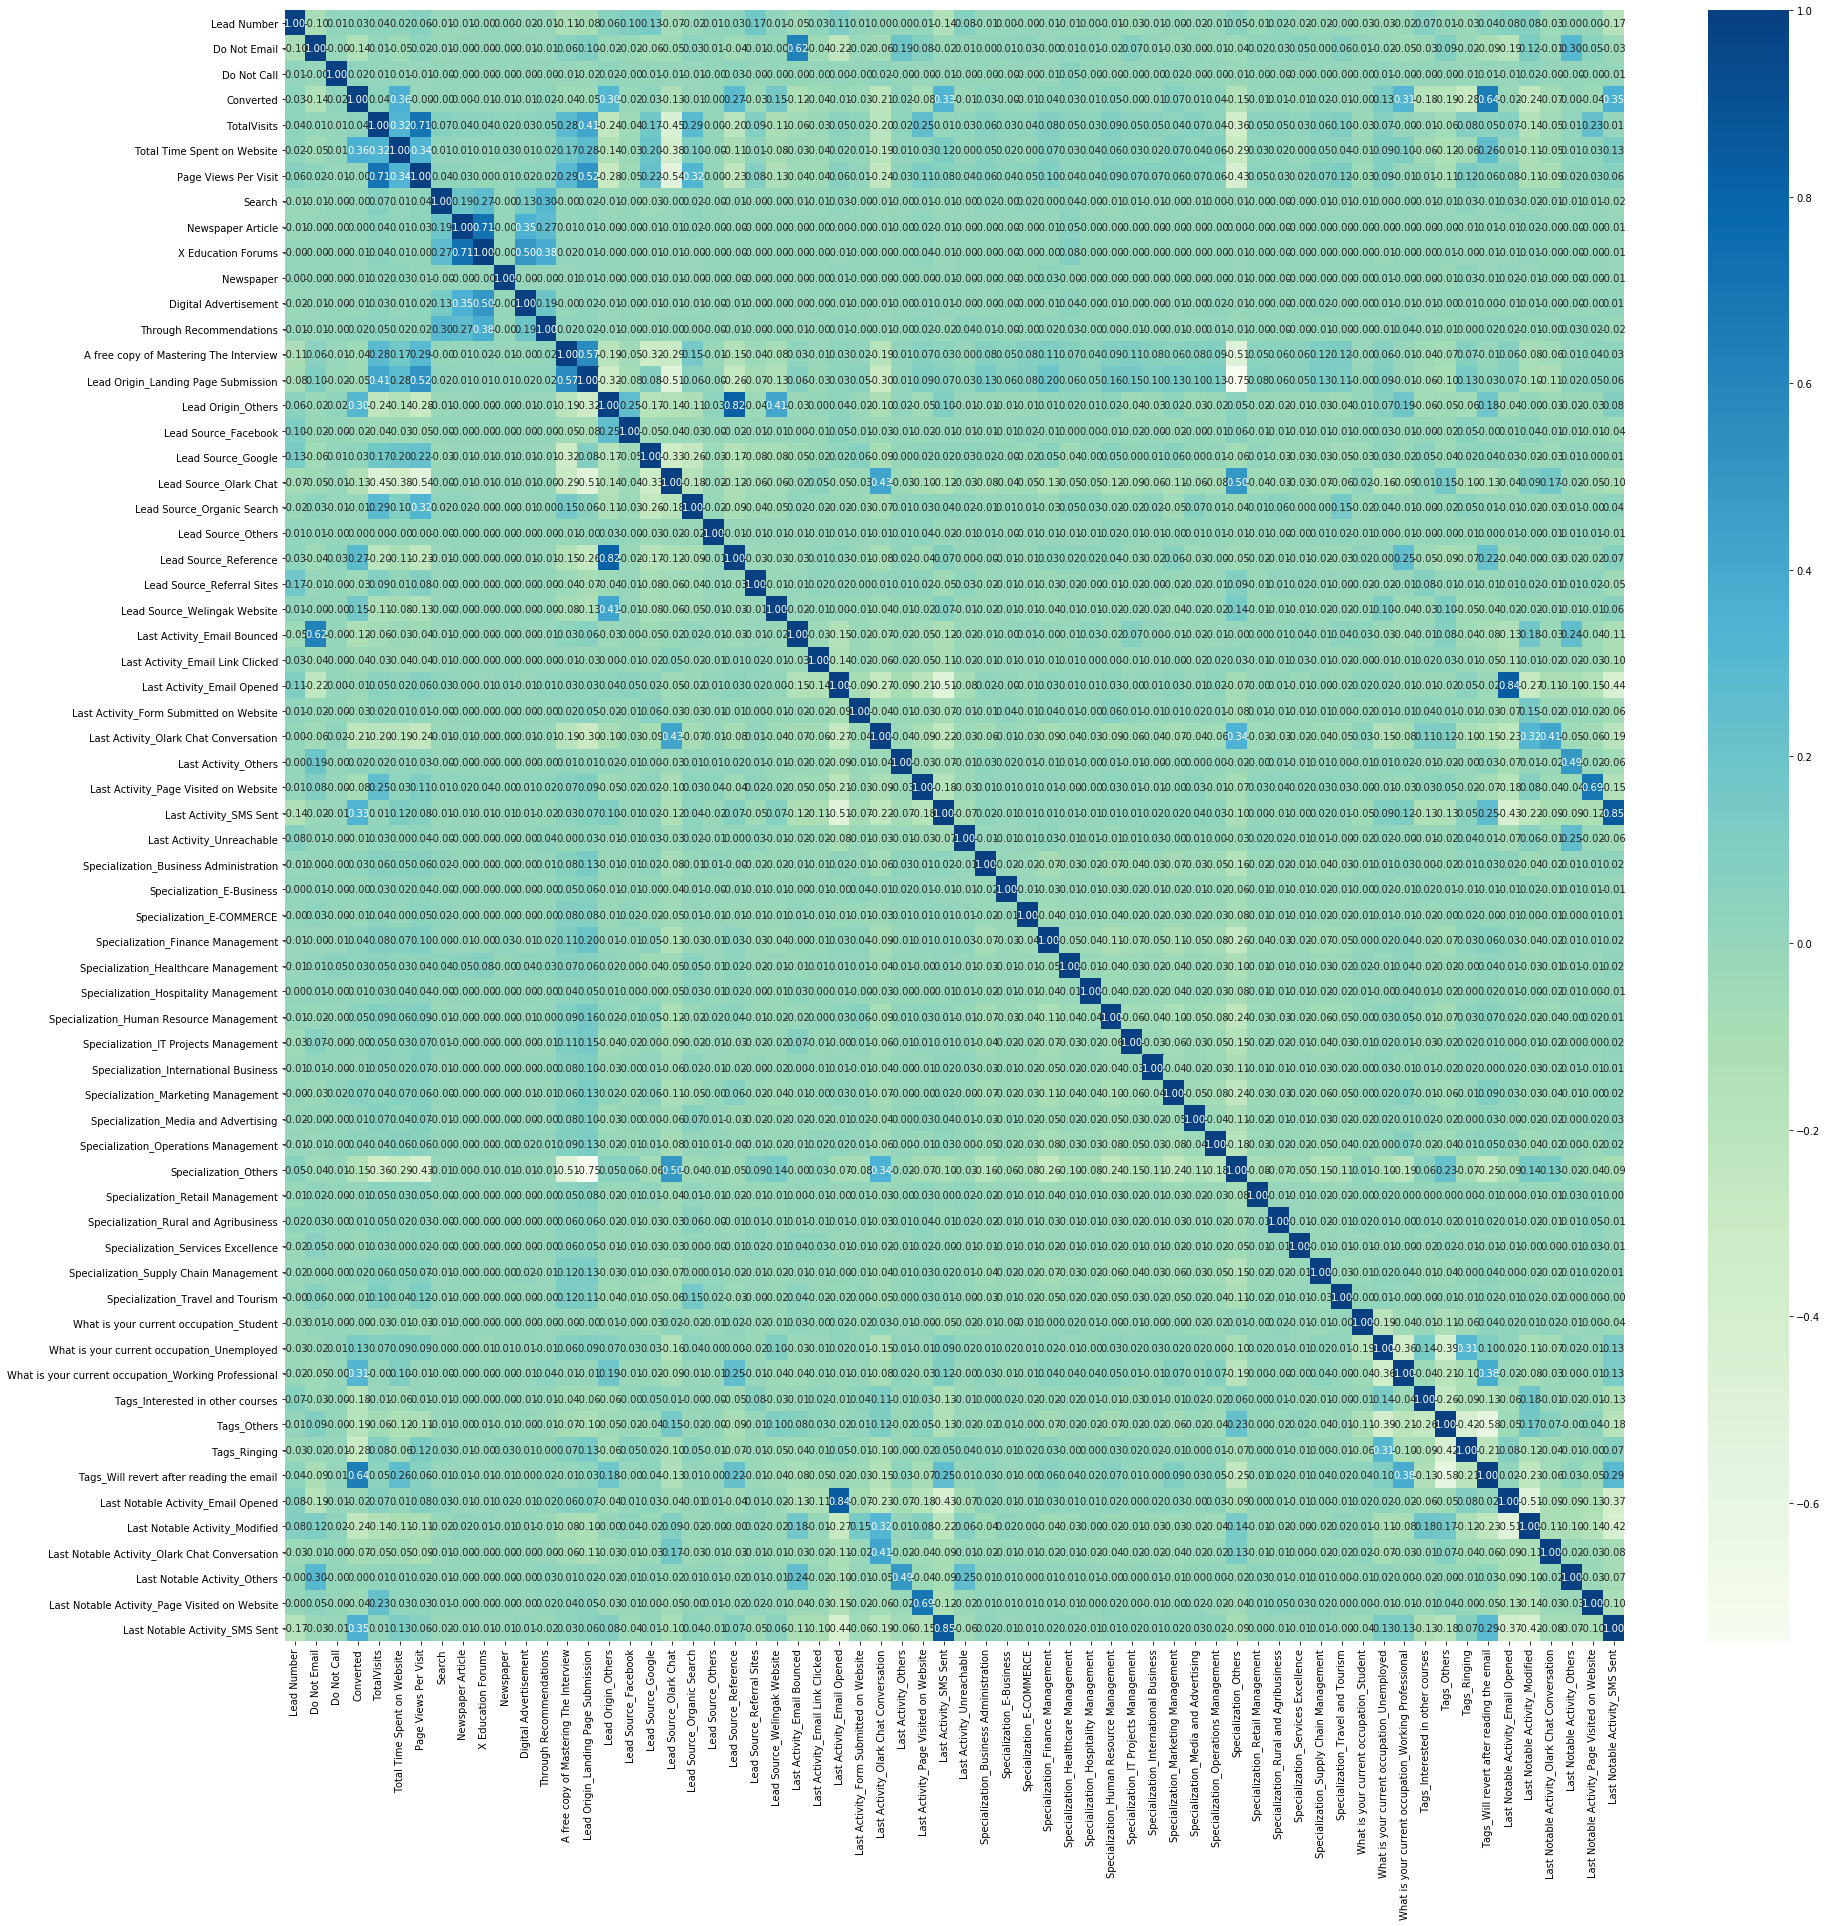

In [74]:
plt.figure(figsize = (30,30))
sns.heatmap(leadscore_df.corr(),annot = True, cmap="GnBu",fmt='.2f')
plt.show()

#### <font color=orange> Checking High Correlated variables and dropping the same

In [75]:
corr_matrix = leadscore_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['Lead Source_Reference',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_SMS Sent']

In [76]:
leadscore_df.drop(to_drop, axis=1, inplace=True)
leadscore_df.head(2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [77]:
leadscore_df.shape

(9240, 61)

### <font color=orange> Checking the Convertion Rate

In [78]:
converted = (sum(leadscore_df['Converted'])/len(leadscore_df['Converted'].index))*100
converted

38.53896103896104

## <font color=orange> Logistic Regression

### <font color=orange> Train-Test Split

In [79]:
X = leadscore_df.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [80]:
y = leadscore_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 100)

### <font color=orange> Feature Scaling

In [82]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website
6205,0,0,0.513155,-0.656909,-0.543355,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1294,1,0,-1.023515,-0.885618,-1.180216,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


### <font color=orange> Logistic Regression Model Building

#### <font color=orange> Model Building - 1

glm: generalized linear model

In [83]:
log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6870
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1669.7
Date:                Mon, 09 Nov 2020   Deviance:                       3339.4
Time:                        16:20:04   Pearson chi2:                 1.33e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.2434      0.871     -8.314      0.000      -8.951      -5.536
Do Not Email                                            -1.4425      0.262     -5.503      0.000      -1.956      -0.929
Do Not Call                                             20.3655   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
TotalVisits                                              0.3372      0.065      5.221      0.000       0.211       0.464
Total Time Spent on Website                              1.1299      0.053     21.268      0.000       1.026       1.234
Page Views Per Visit                                    -0.3139      0.075     -4.164      0.000      -0.462      -0.166
Search                                                   1.4520      1.097      1.324      0.185      -0.697       3.601
Newspaper Article                                       19.2601   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                                     -41.2319   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                              -20.1940   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                   -1.4951      2.605     -0.574      0.566      -6.601       3.611
Through Recommendations                                  1.7838      2.173      0.821      0.412      -2.475       6.043
A free copy of Mastering The Interview                  -0.0061      0.141     -0.044      0.965      -0.282       0.270
Lead Origin_Landing Page Submission                     -0.4649      0.188     -2.474      0.013      -0.833      -0.097
Lead Origin_Others                                       2.9676      0.304      9.774      0.000       2.372       3.563
Lead Source_Facebook                                    -3.6388      0.728     -5.001      0.000      -5.065      -2.213
Lead Source_Google                                       0.0712      0.147      0.486      0.627      -0.216       0.358
Lead Source_Olark Chat                                   1.0290      0.204      5.041      0.000       0.629       1.429
Lead Source_Organic Search                              -0.1347      0.175     -0.771      0.441      -0.477       0.208
Lead Source_Others                                       0.2061      0.952      0.217      0.829      -1.660       2.072
Lead Source_Referral Sites                              -0.2064      0.417     -0.495      0.620      -1.023       0.610
Lead Source_Welingak Website                             1.8296      0.765      2.392      0.017       0.331       3.329
Last Activity_Email Bounced                             -0

### <font color=orange> Feature Selection Using RFE

In [84]:
logreg = LogisticRegression()

In [85]:
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [86]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False])

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Search', True, 1),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 18),
 ('Newspaper', False, 22),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 19),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olar

In [88]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search', 'Lead Origin_Others', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified'],
      dtype='object')

In [89]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_

#### <font color=orange> Model Building - 2

In [90]:
X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6909
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1714.8
Date:                Mon, 09 Nov 2020   Deviance:                       3429.7
Time:                        16:20:31   Pearson chi2:                 1.23e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.4620      0.321    -17.017      0.000      -6.091      -4.833
Do Not Email                                            -1.6240      0.212     -7.644      0.000      -2.040      -1.208
Total Time Spent on Website                              1.1162      0.051     21.766      0.000       1.016       1.217
Search                                                   1.2850      0.995      1.291      0.197      -0.665       3.235
Lead Origin_Others                                       3.4097      0.246     13.852      0.000       2.927       3.892
Lead Source_Facebook                                    -3.5789      0.719     -4.981      0.000      -4.987      -2.171
Lead Source_Olark Chat                                   1.3283      0.129     10.323      0.000       1.076       1.580
Lead Source_Welingak Website                             1.7587      0.760      2.313      0.021       0.269       3.249
Last Activity_Olark Chat Conversation                   -0.8618      0.201     -4.283      0.000      -1.256      -0.467
Last Activity_Others                                     0.9748      0.435      2.240      0.025       0.122       1.828
Last Activity_SMS Sent                                   1.3830      0.098     14.043      0.000       1.190       1.576
Specialization_Hospitality Management                   -0.6776      0.394     -1.720      0.085      -1.450       0.095
Specialization_International Business                   -0.6355      0.333     -1.906      0.057      -1.289       0.018
Specialization_Travel and Tourism                       -0.7511      0.339     -2.216      0.027      -1.415      -0.087
What is your current occupation_Student                  1.2418      0.444      2.800      0.005       0.373       2.111
What is your current occupation_Unemployed               1.3104      0.099     13.250      0.000       1.117       1.504
What is your current occupation_Working Professional     2.5768      0.271      9.517      0.000       2.046       3.107
Tags_Others                                              3.3661      0.304     11.073      0.000       2.770       3.962
Tags_Ringing                                            -0.7110      0.369     -1.926      0.054      -1.435       0.013
Tags_Will revert after reading the email                 6.6167      0.336     19.695      0.000       5.958       7.275
Last Notable Activity_Modified                          -0.7586      0.099     -7.675      0.000      -0.952      -0.565
========================================================================================================================
"""

### <font color=orange> Checking VIFs

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,2.89
18,Tags_Will revert after reading the email,2.54
16,Tags_Others,2.24
19,Last Notable Activity_Modified,1.79
5,Lead Source_Olark Chat,1.79
9,Last Activity_SMS Sent,1.67
17,Tags_Ringing,1.66
3,Lead Origin_Others,1.64
15,What is your current occupation_Working Profes...,1.59
7,Last Activity_Olark Chat Conversation,1.55


In [92]:
col = col.drop('Tags_Ringing', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search', 'Lead Origin_Others', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Others', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified'],
      dtype='object')

#### <font color=orange> Model Building - 3

In [93]:
X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6910
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1716.6
Date:                Mon, 09 Nov 2020   Deviance:                       3433.1
Time:                        16:20:37   Pearson chi2:                 1.21e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9580      0.220    -27.054      0.000      -6.390      -5.526
Do Not Email                                            -1.6212      0.212     -7.640      0.000      -2.037      -1.205
Total Time Spent on Website                              1.1146      0.051     21.748      0.000       1.014       1.215
Search                                                   1.2674      0.988      1.283      0.199      -0.668       3.203
Lead Origin_Others                                       3.3821      0.244     13.859      0.000       2.904       3.860
Lead Source_Facebook                                    -3.5541      0.717     -4.958      0.000      -4.959      -2.149
Lead Source_Olark Chat                                   1.3315      0.129     10.354      0.000       1.079       1.583
Lead Source_Welingak Website                             1.7869      0.759      2.353      0.019       0.298       3.275
Last Activity_Olark Chat Conversation                   -0.8676      0.201     -4.309      0.000      -1.262      -0.473
Last Activity_Others                                     0.9675      0.435      2.222      0.026       0.114       1.821
Last Activity_SMS Sent                                   1.3596      0.097     13.959      0.000       1.169       1.551
Specialization_Hospitality Management                   -0.6540      0.394     -1.658      0.097      -1.427       0.119
Specialization_International Business                   -0.6317      0.333     -1.895      0.058      -1.285       0.022
Specialization_Travel and Tourism                       -0.7468      0.339     -2.203      0.028      -1.411      -0.082
What is your current occupation_Student                  1.3096      0.453      2.889      0.004       0.421       2.198
What is your current occupation_Unemployed               1.3085      0.099     13.250      0.000       1.115       1.502
What is your current occupation_Working Professional     2.5953      0.273      9.511      0.000       2.061       3.130
Tags_Others                                              3.8669      0.190     20.304      0.000       3.494       4.240
Tags_Will revert after reading the email                 7.1108      0.243     29.315      0.000       6.635       7.586
Last Notable Activity_Modified                          -0.7484      0.099     -7.577      0.000      -0.942      -0.555
========================================================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Tags_Will revert after reading the email,2.14
14,What is your current occupation_Unemployed,2.00
16,Tags_Others,1.97
18,Last Notable Activity_Modified,1.79
5,Lead Source_Olark Chat,1.78
3,Lead Origin_Others,1.64
9,Last Activity_SMS Sent,1.61
7,Last Activity_Olark Chat Conversation,1.55
15,What is your current occupation_Working Profes...,1.51
1,Total Time Spent on Website,1.33


In [95]:
col = col.drop('Specialization_Hospitality Management', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search', 'Lead Origin_Others', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_International Business', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Will revert after reading the email', 'Last Notable Activity_Modified'],
      dtype='object')

#### <font color=orange> Model Building - 4

In [96]:
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6911
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1718.0
Date:                Mon, 09 Nov 2020   Deviance:                       3436.0
Time:                        16:20:41   Pearson chi2:                 1.20e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9720      0.220    -27.117      0.000      -6.404      -5.540
Do Not Email                                            -1.6328      0.212     -7.689      0.000      -2.049      -1.217
Total Time Spent on Website                              1.1117      0.051     21.732      0.000       1.011       1.212
Search                                                   1.2781      0.988      1.294      0.196      -0.658       3.214
Lead Origin_Others                                       3.3599      0.243     13.806      0.000       2.883       3.837
Lead Source_Facebook                                    -3.5636      0.712     -5.005      0.000      -4.959      -2.168
Lead Source_Olark Chat                                   1.3373      0.129     10.401      0.000       1.085       1.589
Lead Source_Welingak Website                             1.8176      0.759      2.394      0.017       0.330       3.306
Last Activity_Olark Chat Conversation                   -0.8642      0.201     -4.296      0.000      -1.258      -0.470
Last Activity_Others                                     0.9779      0.436      2.243      0.025       0.123       1.832
Last Activity_SMS Sent                                   1.3608      0.097     13.981      0.000       1.170       1.552
Specialization_International Business                   -0.6205      0.333     -1.863      0.062      -1.273       0.032
Specialization_Travel and Tourism                       -0.7356      0.339     -2.171      0.030      -1.400      -0.072
What is your current occupation_Student                  1.3194      0.453      2.911      0.004       0.431       2.208
What is your current occupation_Unemployed               1.3087      0.099     13.256      0.000       1.115       1.502
What is your current occupation_Working Professional     2.6008      0.272      9.545      0.000       2.067       3.135
Tags_Others                                              3.8732      0.191     20.331      0.000       3.500       4.247
Tags_Will revert after reading the email                 7.1095      0.242     29.340      0.000       6.635       7.584
Last Notable Activity_Modified                          -0.7518      0.099     -7.611      0.000      -0.945      -0.558
========================================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Tags_Will revert after reading the email,2.14
13,What is your current occupation_Unemployed,2.00
15,Tags_Others,1.97
17,Last Notable Activity_Modified,1.79
5,Lead Source_Olark Chat,1.78
3,Lead Origin_Others,1.64
9,Last Activity_SMS Sent,1.61
7,Last Activity_Olark Chat Conversation,1.55
14,What is your current occupation_Working Profes...,1.51
1,Total Time Spent on Website,1.33


In [98]:
col = col.drop('Specialization_International Business', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search', 'Lead Origin_Others', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

#### <font color=orange> Model Building - 5

In [99]:
X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6912
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1719.8
Date:                Mon, 09 Nov 2020   Deviance:                       3439.6
Time:                        16:20:46   Pearson chi2:                 1.18e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9820      0.220    -27.169      0.000      -6.414      -5.550
Do Not Email                                            -1.6332      0.213     -7.674      0.000      -2.050      -1.216
Total Time Spent on Website                              1.1113      0.051     21.748      0.000       1.011       1.211
Search                                                   1.2917      0.987      1.309      0.191      -0.643       3.227
Lead Origin_Others                                       3.3628      0.243     13.826      0.000       2.886       3.840
Lead Source_Facebook                                    -3.5515      0.712     -4.991      0.000      -4.946      -2.157
Lead Source_Olark Chat                                   1.3496      0.128     10.509      0.000       1.098       1.601
Lead Source_Welingak Website                             1.8296      0.759      2.410      0.016       0.342       3.318
Last Activity_Olark Chat Conversation                   -0.8600      0.201     -4.279      0.000      -1.254      -0.466
Last Activity_Others                                     0.9793      0.434      2.254      0.024       0.128       1.831
Last Activity_SMS Sent                                   1.3603      0.097     13.983      0.000       1.170       1.551
Specialization_Travel and Tourism                       -0.7195      0.338     -2.126      0.033      -1.383      -0.056
What is your current occupation_Student                  1.2909      0.458      2.822      0.005       0.394       2.188
What is your current occupation_Unemployed               1.3073      0.099     13.251      0.000       1.114       1.501
What is your current occupation_Working Professional     2.6036      0.272      9.587      0.000       2.071       3.136
Tags_Others                                              3.8680      0.190     20.319      0.000       3.495       4.241
Tags_Will revert after reading the email                 7.0985      0.242     29.330      0.000       6.624       7.573
Last Notable Activity_Modified                          -0.7472      0.099     -7.576      0.000      -0.941      -0.554
========================================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Tags_Will revert after reading the email,2.14
12,What is your current occupation_Unemployed,1.99
14,Tags_Others,1.96
16,Last Notable Activity_Modified,1.79
5,Lead Source_Olark Chat,1.78
3,Lead Origin_Others,1.64
9,Last Activity_SMS Sent,1.61
7,Last Activity_Olark Chat Conversation,1.55
13,What is your current occupation_Working Profes...,1.51
1,Total Time Spent on Website,1.33


In [101]:
col = col.drop('Search', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Others', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

#### <font color=orange> Model Building - 6

In [102]:
X_train_sm = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6913
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1720.6
Date:                Mon, 09 Nov 2020   Deviance:                       3441.2
Time:                        16:20:53   Pearson chi2:                 1.18e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9764      0.220    -27.151      0.000      -6.408      -5.545
Do Not Email                                            -1.6353      0.213     -7.686      0.000      -2.052      -1.218
Total Time Spent on Website                              1.1117      0.051     21.762      0.000       1.012       1.212
Lead Origin_Others                                       3.3603      0.243     13.817      0.000       2.884       3.837
Lead Source_Facebook                                    -3.5516      0.712     -4.992      0.000      -4.946      -2.157
Lead Source_Olark Chat                                   1.3464      0.128     10.492      0.000       1.095       1.598
Lead Source_Welingak Website                             1.8301      0.759      2.411      0.016       0.342       3.318
Last Activity_Olark Chat Conversation                   -0.8623      0.201     -4.292      0.000      -1.256      -0.469
Last Activity_Others                                     0.9772      0.434      2.250      0.024       0.126       1.828
Last Activity_SMS Sent                                   1.3584      0.097     13.966      0.000       1.168       1.549
Specialization_Travel and Tourism                       -0.7221      0.338     -2.135      0.033      -1.385      -0.059
What is your current occupation_Student                  1.2868      0.457      2.814      0.005       0.390       2.183
What is your current occupation_Unemployed               1.3051      0.099     13.238      0.000       1.112       1.498
What is your current occupation_Working Professional     2.5998      0.272      9.576      0.000       2.068       3.132
Tags_Others                                              3.8679      0.190     20.315      0.000       3.495       4.241
Tags_Will revert after reading the email                 7.0966      0.242     29.320      0.000       6.622       7.571
Last Notable Activity_Modified                          -0.7467      0.099     -7.571      0.000      -0.940      -0.553
========================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Tags_Will revert after reading the email,2.14
11,What is your current occupation_Unemployed,1.99
13,Tags_Others,1.96
15,Last Notable Activity_Modified,1.79
4,Lead Source_Olark Chat,1.78
2,Lead Origin_Others,1.64
8,Last Activity_SMS Sent,1.60
6,Last Activity_Olark Chat Conversation,1.55
12,What is your current occupation_Working Profes...,1.51
1,Total Time Spent on Website,1.33


#### <font color=green> INSIGHT: No Multicollinearity in our variables and there are no insignificant p-values and all VIF's are within 3.

### <font color=orange> Getting y_pred values for train data

In [106]:
y_train_pred = log_m6.predict(X_train_sm)
y_train_pred.head()

6205    0.055270
1294    0.327777
7629    0.068575
7456    0.086311
5346    0.998303
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.05526978, 0.32777663, 0.06857459, 0.08631091, 0.99830261])

#### <font color=orange> Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.055270,6205
1,1,0.327777,1294
2,0,0.068575,7629
3,1,0.086311,7456
4,1,0.998303,5346


#### <font color=orange> Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [109]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.055270,6205,0
1,1,0.327777,1294,0
2,0,0.068575,7629,0
3,1,0.086311,7456,0
4,1,0.998303,5346,1


### <font color=orange> Creating a Confusion Matrix

In [110]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

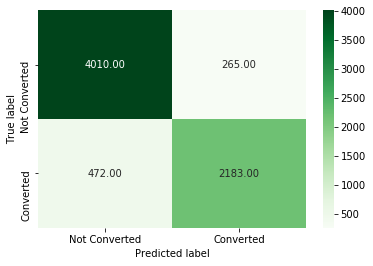

In [111]:
draw_cm(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4010  265]
 [ 472 2183]]


### <font color=orange> Accuracy of the Model

In [113]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8936507936507937


### <font color=orange> Metrics beyond simply accuracy

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### <font color=orange> Sensitivity

In [115]:
TP / float(TP+FN)

0.8222222222222222

#### <font color=orange> Specificity

In [116]:
TN / float(TN+FP)

0.9380116959064327

#### <font color=orange> False Positive Rate

In [117]:
FP / float(TN+FP)

0.06198830409356725

#### <font color=orange> Positive Predicted Value

In [118]:
TP / float(TP+FP)

0.891748366013072

#### <font color=orange> Negative Predictive Value

In [119]:
TN / float(TN+FN)

0.894689870593485

### <font color=orange> Plotting the ROC Curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

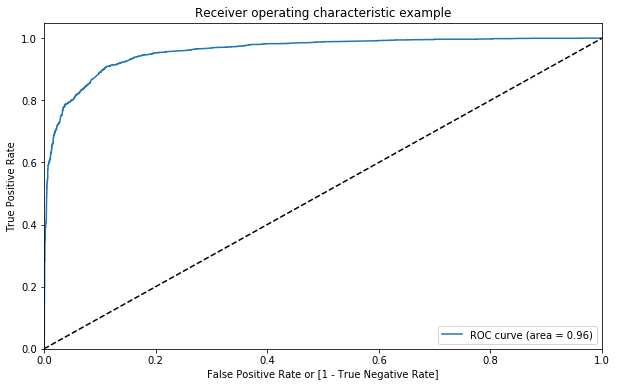

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### <font color=orange> Finding Optimal Cutoff Point

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055270,6205,0,1,0,0,0,0,0,0,0,0,0
1,1,0.327777,1294,0,1,1,1,1,0,0,0,0,0,0
2,0,0.068575,7629,0,1,0,0,0,0,0,0,0,0,0
3,1,0.086311,7456,0,1,0,0,0,0,0,0,0,0,0
4,1,0.998303,5346,1,1,1,1,1,1,1,1,1,1,1


In [124]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383117  1.000000  0.000000
0.1   0.1  0.789322  0.970621  0.676725
0.2   0.2  0.871717  0.943126  0.827368
0.3   0.3  0.892929  0.911488  0.881404
0.4   0.4  0.896681  0.867043  0.915088
0.5   0.5  0.893651  0.822222  0.938012
0.6   0.6  0.893651  0.790960  0.957427
0.7   0.7  0.885714  0.752919  0.968187
0.8   0.8  0.872150  0.697928  0.980351
0.9   0.9  0.844300  0.610923  0.989240


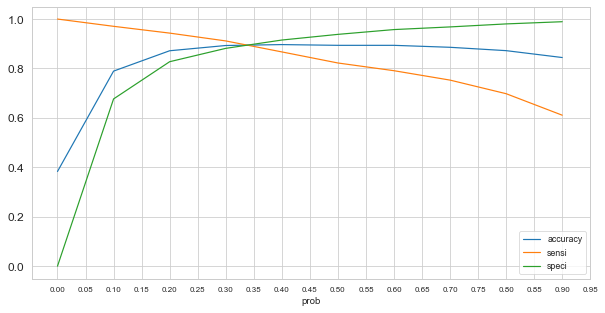

In [125]:
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,5))
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### <font color=green> From the curve above, 0.33 is the optimum point to take it as a threshold.

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.055270,6205,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.327777,1294,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.068575,7629,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.086311,7456,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.998303,5346,1,1,1,1,1,1,1,1,1,1,1,1


In [127]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

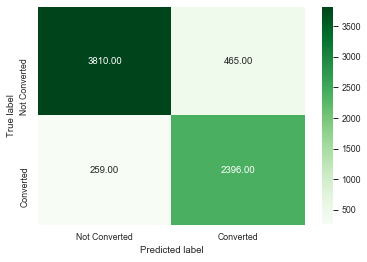

In [128]:
draw_cm(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3810,  465],
       [ 259, 2396]], dtype=int64)

### <font color=orange> Accuracy of the Model

In [130]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8955266955266955

### <font color=orange> Metrics beyond simply accuracy

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### <font color=orange> Sensitivity

In [132]:
TP / float(TP+FN)

0.9024482109227872

#### <font color=orange> Specificity

In [133]:
TN / float(TN+FP)

0.8912280701754386

#### <font color=orange> False Positive Rate

In [134]:
FP / float(TN+FP)

0.10877192982456141

#### <font color=orange> Positive Predicted Value

In [135]:
TP / float(TP+FP)

0.8374694162880112

#### <font color=orange> Negative Predictive Value

In [136]:
TN / float(TN+FN)

0.9363479970508725

### <font color=orange> Precision and Recall

#### <font color=orange> Precision

In [137]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8374694162880112

#### <font color=orange> Recall

In [138]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9024482109227872

#### <font color=orange> Precision Score

In [139]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.891748366013072

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8374694162880112

#### <font color=orange> Recall Score

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8222222222222222

In [142]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9024482109227872

In [143]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4275
           1       0.84      0.90      0.87      2655

    accuracy                           0.90      6930
   macro avg       0.89      0.90      0.89      6930
weighted avg       0.90      0.90      0.90      6930



### <font color=orange> Precision and Recall trade-off

In [144]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6925    1
 6926    1
 6927    1
 6928    0
 6929    0
 Name: Converted, Length: 6930, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6925    1
 6926    1
 6927    1
 6928    0
 6929    0
 Name: final_predicted, Length: 6930, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

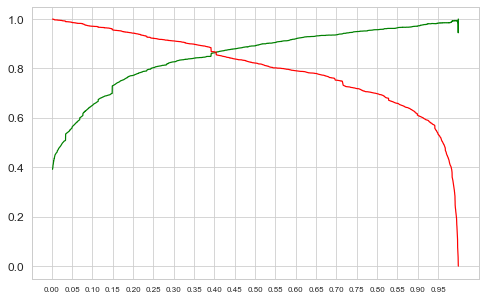

In [146]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### <font color=green> INSIGHT: </font>
#### <font color=green>The Precission & Recall Trade Off seems to be 0.39.</font>
#### <font color=green>    We can use 0.39 as threshold for Test data.

### <font color=orange> From the curve above, 0.39 is the optimum point to take it as a threshold

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.055270,6205,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.327777,1294,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.068575,7629,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.086311,7456,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.998303,5346,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

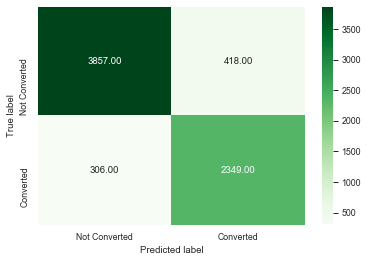

In [149]:
draw_cm(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [150]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3857,  418],
       [ 306, 2349]], dtype=int64)

### <font color=orange> Accuracy of the Model

In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8955266955266955

### <font color=orange> Metrics beyond simply accuracy

In [152]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

#### <font color=orange> Sensitivity

In [153]:
TP / float(TP+FN)

0.8847457627118644

#### <font color=orange> Specificity

In [154]:
TN / float(TN+FP)

0.9022222222222223

#### <font color=orange> False Positive Rate

In [155]:
FP / float(TN+FP)

0.09777777777777778

#### <font color=orange> Positive Predicted Value

In [156]:
TP / float(TP+FP)

0.848933863389953

#### <font color=orange> Negative Predictive Value

In [157]:
TN / float(TN+FN)

0.9264953158779726

### <font color=orange> Precision and Recall

#### <font color=orange> Precision

In [158]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.848933863389953

#### <font color=orange> Recall

In [159]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8847457627118644

In [160]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4275
           1       0.85      0.88      0.87      2655

    accuracy                           0.90      6930
   macro avg       0.89      0.89      0.89      6930
weighted avg       0.90      0.90      0.90      6930



### <font color=green> Insights on Train set: </font>
#### <font color=green> Sensitivity: 0.88 </font>
#### <font color=green> Precision: 0.85 </font>
#### <font color=green> Accuracy: 0.90 </font>
#### <font color=green> AUC: 0.96

### <font color=orange> Making predictions on the test set

In [161]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [162]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Others,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified
4269,0,0.964182,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2376,0,-0.885618,1,0,0,0,0,0,1,0,0,1,0,0,1,0
7766,0,-0.777668,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9199,0,-0.885618,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4359,0,-0.885618,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [163]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = log_m6.predict(X_test_sm)
y_test_pred.head()

4269    0.579765
2376    0.997891
7766    0.945607
9199    0.002683
4359    0.991847
dtype: float64

In [164]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.579765
2376,0.997891
7766,0.945607
9199,0.002683
4359,0.991847


In [165]:
y_test_df = pd.DataFrame(y_test)

In [166]:
y_test_df['Lead Number'] = y_test_df.index

In [167]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.579765
1,1,2376,0.997891
2,1,7766,0.945607
3,0,9199,0.002683
4,1,4359,0.991847


In [169]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.579765
1,1,2376,0.997891
2,1,7766,0.945607
3,0,9199,0.002683
4,1,4359,0.991847


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.579765,1
1,1,2376,0.997891,1
2,1,7766,0.945607,1
3,0,9199,0.002683,0
4,1,4359,0.991847,1


In [171]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

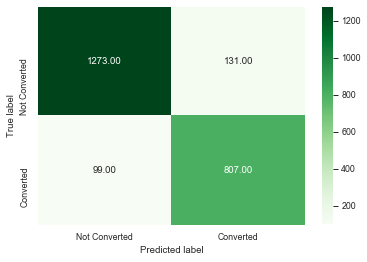

In [172]:
draw_cm(y_pred_final.Converted, y_pred_final.final_predicted)

###  <font color=orange> Confusion Matrix

In [173]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1273,  131],
       [  99,  807]], dtype=int64)

### <font color=orange> Accuracy of the Model

In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9004329004329005

### <font color=orange> Metrics beyond simply accuracy

In [175]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

#### <font color=orange> Sensitivity

In [176]:
TP / float(TP+FN)

0.890728476821192

#### <font color=orange> Specificity

In [177]:
TN / float(TN+FP)

0.9066951566951567

#### <font color=orange> False Positive Rate

In [178]:
FP / float(TN+FP)

0.0933048433048433

#### <font color=orange> Positive Predicted Value

In [179]:
TP / float(TP+FP)

0.8603411513859275

#### <font color=orange> Negative Predictive Value

In [180]:
TN / float(TN+FN)

0.9278425655976676

### <font color=orange> Plotting the ROC Curve

In [181]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [182]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

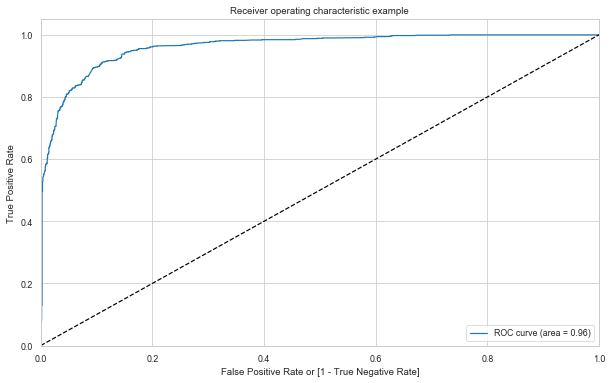

In [183]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

### <font color=orange> Precision and Recall

#### <font color=orange> Precision

In [184]:
precision = confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])
precision

0.8603411513859275

#### <font color=orange> Recall

In [185]:
Recall = confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])
Recall

0.890728476821192

In [186]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1404
           1       0.86      0.89      0.88       906

    accuracy                           0.90      2310
   macro avg       0.89      0.90      0.90      2310
weighted avg       0.90      0.90      0.90      2310



### <font color=green> Insights on Test set: </font>
#### <font color=green> Sensitivity: 0.89 </font>
#### <font color=green> Precision: 0.86 </font>
#### <font color=green> Accuracy: 0.90 </font>
#### <font color=green> AUC: 0.96

### <font color=green> Summary

#### <font color=green> ~89% of Recall value indicates that our model is able to predict 89% of actual conversion cases correctly
#### <font color=green> ~86% of Precision value indicates that 86% of the conversions that our model predicted is actually converted.

### <font color=orange> Generating Lead Scoring table

In [186]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.sort_values(by='Lead_Score',ascending=False)

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
1182,1,6305,0.996651,1,100
498,1,2524,0.998589,1,100
1990,1,8509,0.997791,1,100
338,1,8113,0.998780,1,100
1976,1,4775,0.999421,1,100
...,...,...,...,...,...
674,0,7197,0.001947,0,0
1003,0,1639,0.001367,0,0
1757,0,4641,0.002073,0,0
1753,0,8881,0.000346,0,0


In [187]:
sorted_predict_df = y_pred_final[['Converted_Prob','Converted']].sort_values( 'Converted_Prob',ascending = False )
sorted_predict_df

,Converted_Prob,Converted
224,0.999892,1
603,0.999877,1
1026,0.999779,1
953,0.999764,1
743,0.999661,1
...,...,...
2211,0.000410,0
136,0.000365,0
1753,0.000346,0
1846,0.000206,0


In [188]:
num_per_decile = int( len(sorted_predict_df) / 10)
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  231


In [189]:
def get_deciles(df): 
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, 
                df.columns.get_loc('decile')] = each_d,
        idx += num_per_decile
       
    df['decile'] = df['decile'] + 1 
    return df

In [190]:
deciles_predict_df = get_deciles(sorted_predict_df)
deciles_predict_df

,Converted_Prob,Converted,decile
224,0.999892,1,1
603,0.999877,1,1
1026,0.999779,1,1
953,0.999764,1,1
743,0.999661,1,1
...,...,...,...
2211,0.000410,0,10
136,0.000365,0,10
1753,0.000346,0,10
1846,0.000206,0,10


In [191]:
deciles_predict_df[0:10]

,Converted_Prob,Converted,decile
224,0.999892,1,1
603,0.999877,1,1
1026,0.999779,1,1
953,0.999764,1,1
743,0.999661,1,1
826,0.999655,1,1
1245,0.999633,1,1
2077,0.999608,1,1
1853,0.999599,1,1
226,0.999425,1,1


In [192]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby(
        'decile')['Converted'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']

In [193]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,228,25.165563
1,2,230,50.551876
2,3,196,72.185430
3,4,145,88.189845
4,5,73,96.247241
5,6,18,98.233996
6,7,7,99.006623
7,8,7,99.779249
8,9,2,100.000000
9,10,0,100.000000


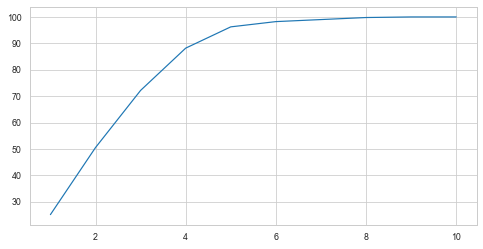

In [194]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'],
         gain_lift_df['gain_percentage'], '-' ) 
plt.show()

In [195]:
gain_lift_df['lift'] = (gain_lift_df.gain_percentage / (gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,228,25.165563,2.516556
1,2,230,50.551876,2.527594
2,3,196,72.185430,2.406181
3,4,145,88.189845,2.204746
4,5,73,96.247241,1.924945
5,6,18,98.233996,1.637233
6,7,7,99.006623,1.414380
7,8,7,99.779249,1.247241
8,9,2,100.000000,1.111111
9,10,0,100.000000,1.000000


In [196]:
num_per_decile = int(len(sorted_predict_df) / 10)
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  231


### <font color=orange> Top Features/Predictors

In [197]:
#Getting parameters from final model
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_m6.params[1:]
final_parameters

Do Not Email                                           -1.64
Total Time Spent on Website                             1.11
Lead Origin_Others                                      3.36
Lead Source_Facebook                                   -3.55
Lead Source_Olark Chat                                  1.35
Lead Source_Welingak Website                            1.83
Last Activity_Olark Chat Conversation                  -0.86
Last Activity_Others                                    0.98
Last Activity_SMS Sent                                  1.36
Specialization_Travel and Tourism                      -0.72
What is your current occupation_Student                 1.29
What is your current occupation_Unemployed              1.31
What is your current occupation_Working Professional    2.60
Tags_Others                                             3.87
Tags_Will revert after reading the email                7.10
Last Notable Activity_Modified                         -0.75
dtype: float64

In [198]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                                           -23.04
Total Time Spent on Website                             15.66
Lead Origin_Others                                      47.35
Lead Source_Facebook                                   -50.05
Lead Source_Olark Chat                                  18.97
Lead Source_Welingak Website                            25.79
Last Activity_Olark Chat Conversation                  -12.15
Last Activity_Others                                    13.77
Last Activity_SMS Sent                                  19.14
Specialization_Travel and Tourism                      -10.18
What is your current occupation_Student                 18.13
What is your current occupation_Unemployed              18.39
What is your current occupation_Working Professional    36.64
Tags_Others                                             54.50
Tags_Will revert after reading the email               100.00
Last Notable Activity_Modified                         -10.52
dtype: f

In [199]:
# Sorting the Predictor variables based on their relative coefficient values
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Do Not Email                                             3
Total Time Spent on Website                              0
Lead Origin_Others                                       6
Lead Source_Facebook                                    15
Lead Source_Olark Chat                                   9
Lead Source_Welingak Website                             7
Last Activity_Olark Chat Conversation                    1
Last Activity_Others                                    10
Last Activity_SMS Sent                                  11
Specialization_Travel and Tourism                        4
What is your current occupation_Student                  8
What is your current occupation_Unemployed               5
What is your current occupation_Working Professional    12
Tags_Others                                              2
Tags_Will revert after reading the email                13
Last Notable Activity_Modified                          14
dtype: int64

<Figure size 864x576 with 0 Axes>

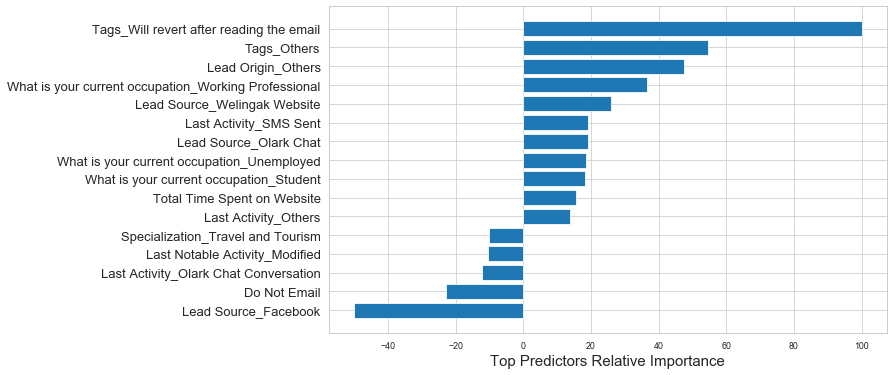

In [200]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

### <font color=orange> TOP 3 Variables

In [201]:
top_predictors_df = pd.DataFrame(top_predictors).reset_index().sort_values(by=0,ascending=False)
top_predictors_df = top_predictors_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
top_predictors_df = top_predictors_df.reset_index(drop=True)
top_predictors_df.head(3)

,Variables,Relative coeffient value
0,Tags_Will revert after reading the email,100.00
1,Tags_Others,54.50
2,Lead Origin_Others,47.35


## <font color=burgandy> Summary </font>
#### <font color=burgandy> - Sensitivity/Recall: 0.89 </font>
#### <font color=burgandy> - Precision: 0.86 </font>
#### <font color=burgandy> - Accuracy: 0.90 </font>

### <font color=burgandy> Top 3 Variables </font>
#### <font color=burgandy> - Tags_Will revert after reading the email </font>
#### <font color=burgandy> - Tags_Others </font>
#### <font color=burgandy> - Lead Origin_Others

## <font color=burgandy> Final Comments </font>
#### <font color=burgandy> - There information has been collected directly from Lead Origin and Lead Source. </font> 
#### <font color=burgandy> - People spend a lot of time in the website and this can be done by making the website interesting and thus bringing them back to the site.</font>
#### <font color=burgandy> - They are seen coming back to the website repeatedly from different sources. </font>
#### <font color=burgandy> - People are reverting after reading the email. </font>
#### <font color=burgandy> - Last Activity, Specialization and Current Occupation plays a major role.
